In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('modified_synthetic_economic_data.csv')
data

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866
...,...,...,...,...,...
1195,2019,12,3.44,2.83,767.901200
1196,2020,12,2.98,3.62,541.022220
1197,2021,12,3.55,3.49,731.564473
1198,2022,12,3.22,5.31,435.166468


In [3]:
data.drop(columns = ['year', 'month'], axis = 1, inplace=True)
data

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866
...,...,...,...
1195,3.44,2.83,767.901200
1196,2.98,3.62,541.022220
1197,3.55,3.49,731.564473
1198,3.22,5.31,435.166468


In [4]:
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

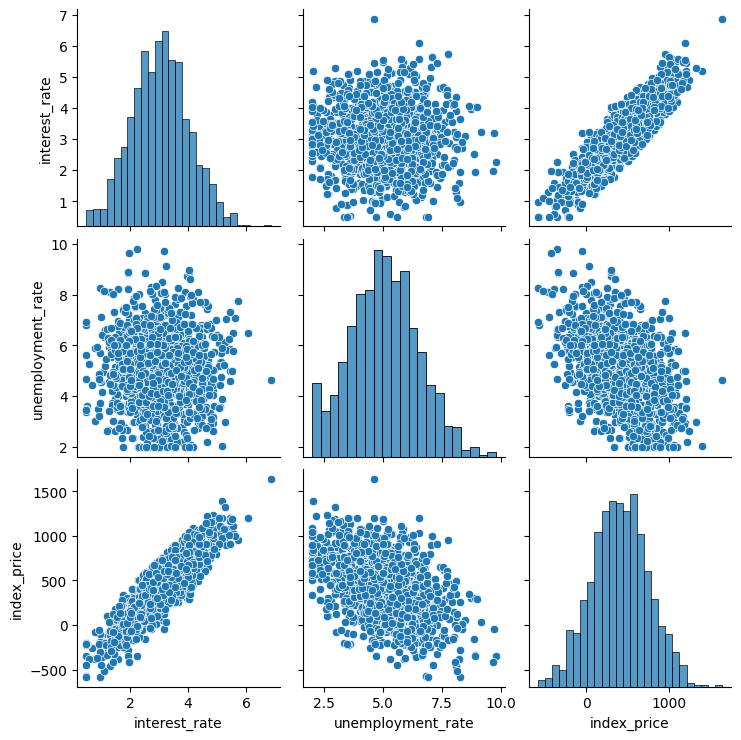

In [5]:
sns.pairplot(data)

<Axes: >

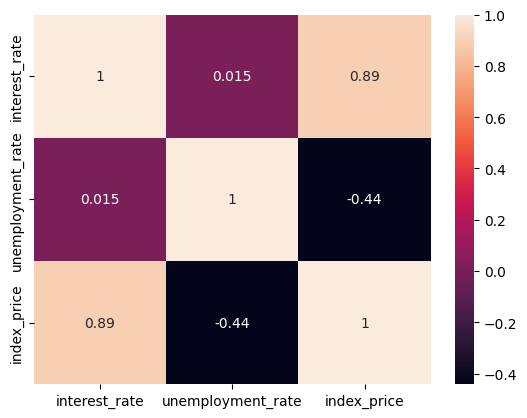

In [6]:
sns.heatmap(data.corr(), annot=True)

In [7]:
x = data.drop('index_price', axis = 1)
x

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07
...,...,...
1195,3.44,2.83
1196,2.98,3.62
1197,3.55,3.49
1198,3.22,5.31


In [8]:
y = data['index_price']
y

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

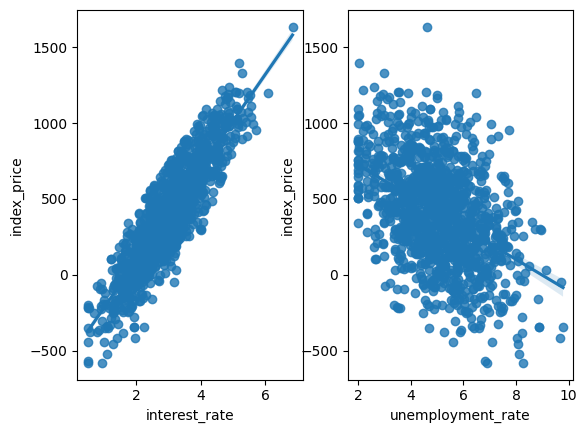

In [12]:
for i in range(len(x.columns)):
    plt.subplot(1,2,i+1)
    sns.regplot(data = data, x = x.columns[i], y = "index_price")
    plt.xlabel(x.columns[i])
    plt.ylabel("index_price")

plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, x_test.shape

((960, 2), (240, 2))

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[-0.97050932, -1.85563373],
        [ 0.49558752, -0.28841633],
        [ 0.05887783,  2.37654366],
        ...,
        [ 0.29802837, -0.32984058],
        [ 0.17325417,  0.85765455],
        [ 0.27723267, -1.15832555]]),
 array([[-1.06408997, -0.45411332],
        [-0.44021897, -0.62671436],
        [-0.47141252,  1.00263942],
        [-0.09708992, -1.13070938],
        [ 0.30842622, -0.75789115],
        [ 1.11945852,  0.42960398],
        [ 2.13844781, -1.02024472],
        [-0.50260607, -0.88906793],
        [-1.19926202, -1.64160845],
        [-0.62738027, -0.87525985],
        [-0.57539102,  0.03607362],
        [-1.57358462, -0.69575477],
        [-1.86472441, -1.63470441],
        [-0.58578887,  0.1327302 ],
        [-0.85613297,  0.65743734],
        [-0.96011147, -0.20556783],
        [ 0.55797462,  0.60910905],
        [-0.76255232,  0.06368978],
        [ 0.98428647, -0.05367892],
        [ 0.97388862, -0.7164669 ],
        [-0.90812222,  0.18105849],
        [ 1.5

In [19]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

https://www.geeksforgeeks.org/cross-validation-machine-learning/

For seeing what is cross validation score


In [21]:
validation_score = cross_val_score(reg, x_train, y_train, scoring="neg_mean_squared_error", cv = 5)

In [22]:
np.mean(validation_score)

-0.6373345841021423

In [23]:
reg.coef_, reg.intercept_

(array([ 298.16702069, -154.68054612]), 406.38967307980585)

In [27]:
pred = reg.predict(x_test)
mse = mean_squared_error(pred, y_test)
mae = mean_absolute_error(pred, y_test)
mse, mae

(0.34478127689671595, 0.22302280653244394)

In [29]:
score = r2_score(pred, y_test)
score

0.9999972925121792

In [30]:
adj_score = 1 - (((1-score)*(len(y_test) - 1))/(len(y_test) - x_test.shape[1] - 1))
adj_score

0.9999972696641807

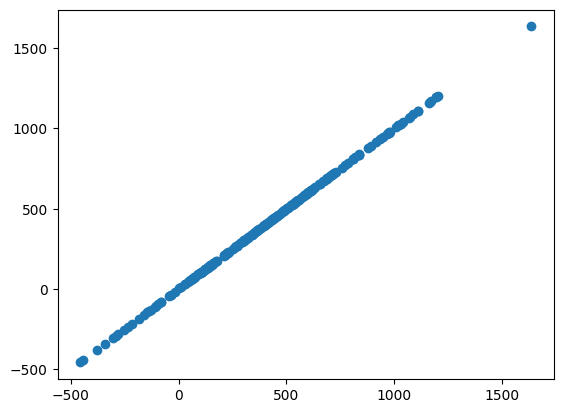

In [31]:
plt.scatter(pred, y_test)

We get a linear graph so our model is good